In [152]:
import pandas as pd 
import numpy as np
#import seaborn as sns

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

import matplotlib.pyplot as plt

import datetime
from datetime import datetime

In [137]:
data_consumo = pd.read_csv('DatosConsumoCombustibles.csv')
data_importaciones = pd.read_csv('DatosImportacionCombustibles.csv')

In [3]:
data_consumo.head()

,Unnamed: 0,Anio,Mes,GasolinaSuper,GasolinaRegular,TotalGasolinas,Diesel,DieselLS,DieselULS,TotalDiesel,...,AceitesLubricantes,GrasasLubricantes,Solventes,Naftas,Ceras,CrudoNacional,Butano,Orimulsion,MezclasOleosas,Total
0,3,2000,1,308156.82,202645.20,510802.02,634667.06,NaN,NaN,634667.06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1750544.64
1,4,2000,2,307766.31,205530.96,513297.27,642380.66,NaN,NaN,642380.66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1773220.22
2,5,2000,3,331910.29,229499.56,561409.85,699807.25,NaN,NaN,699807.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909498.79
3,6,2000,4,315648.08,210680.40,526328.48,586803.98,NaN,NaN,586803.98,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1800932.86
4,7,2000,5,319667.97,208164.34,527832.31,656948.20,NaN,NaN,656948.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1941771.90


In [4]:
data_importaciones.head()

,Unnamed: 0,Anio,Mes,GasolinaSuper,GasolinaRegular,TotalGasolinas,Diesel,DieselLS,DieselULS,TotalDiesel,...,Solventes,Naftas,Ceras,Butano,PetroleoReconstit,MTBE,Orimulsion,MezclasOleosas,PetroleoCrudo,TotalMensual
0,3,2001,1,373963.96,177776.50,551740.46,566101.99,NaN,NaN,566101.99,...,NaN,NaN,NaN,NaN,715344.0,8402.0,NaN,NaN,NaN,2312639.05
1,4,2001,2,243091.07,123115.99,366207.06,489525.80,NaN,NaN,489525.80,...,NaN,NaN,NaN,NaN,370166.0,NaN,NaN,NaN,NaN,1769208.76
2,5,2001,3,312084.38,161726.42,473810.80,575559.68,NaN,NaN,575559.68,...,NaN,NaN,NaN,NaN,360530.0,NaN,NaN,NaN,NaN,1945770.26
3,6,2001,4,285054.89,127338.74,412393.63,437745.42,NaN,NaN,437745.42,...,NaN,NaN,NaN,NaN,359527.0,8184.0,NaN,NaN,NaN,1623637.76
4,7,2001,5,300913.67,168730.19,469643.86,552609.13,NaN,NaN,552609.13,...,NaN,NaN,NaN,NaN,723346.0,12680.0,NaN,NaN,NaN,2262726.64


In [5]:
data_consumo.dtypes

Unnamed: 0              int64
Anio                    int64
Mes                     int64
GasolinaSuper         float64
GasolinaRegular       float64
TotalGasolinas        float64
Diesel                float64
DieselLS              float64
DieselULS             float64
TotalDiesel           float64
GLP                   float64
GasolinaAviacion      float64
Kerosina              float64
TurboJet              float64
Bunker                float64
Asfalto               float64
PetCoke               float64
AceitesLubricantes    float64
GrasasLubricantes     float64
Solventes             float64
Naftas                float64
Ceras                 float64
CrudoNacional         float64
Butano                float64
Orimulsion            float64
MezclasOleosas        float64
Total                 float64
dtype: object

In [138]:
anio = data_consumo.Anio*10000
mes = data_consumo.Mes*100+1
data_consumo['Date'] = pd.to_datetime((data_consumo.Anio*10000+data_consumo.Mes*100+1).apply(str),format='%Y%m%d')

anio = data_importaciones.Anio*10000
mes = data_importaciones.Mes*100+1
data_importaciones['Date'] = pd.to_datetime((data_importaciones.Anio*10000+data_importaciones.Mes*100+1).apply(str),format='%Y%m%d')

In [139]:
data_consumo.index = data_consumo.Date
data_importaciones.index = data_importaciones.Date

# Serie univariante

### Super consumo

In [140]:
def plot_df(df, x, y, title="", xlabel='Fecha', ylabel='Valor', dpi=1000):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(data_consumo, x=data_consumo.Date, y=data_consumo.GasolinaSuper, title='Gasolina Super')

### Super importaciones

In [141]:
plot_df(data_importaciones, x=data_importaciones.Date, y=data_importaciones.GasolinaSuper, title='Gasolina Super')

# Descomposición de la serie en componentes

### Super dataset consumo

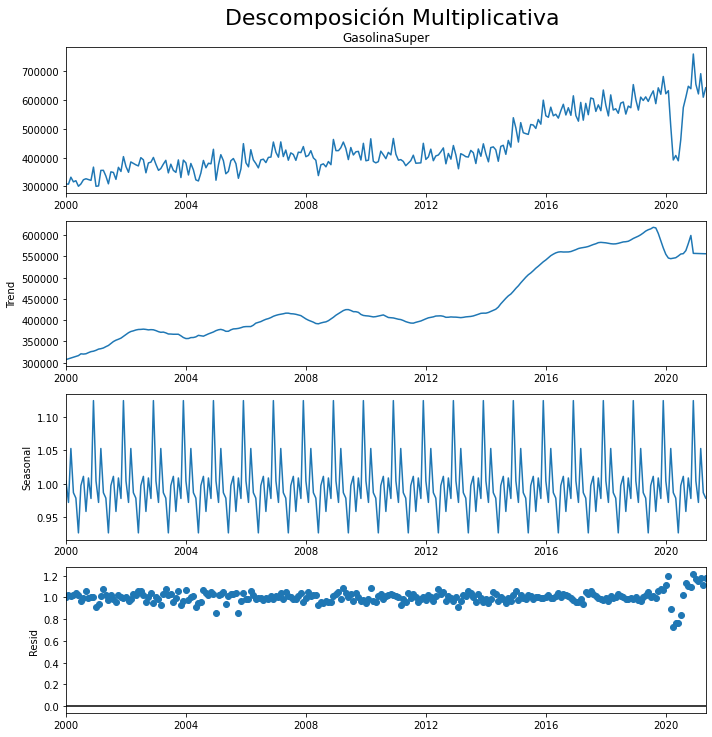

In [131]:
result_mul = seasonal_decompose(data_consumo['GasolinaSuper'], model='multiplicative', extrapolate_trend='freq')
plt.rcParams.update({'figure.figsize': (10,10)})
_ = result_mul.plot().suptitle('Descomposición Multiplicativa', fontsize=22, x=0.55, y=1.02)

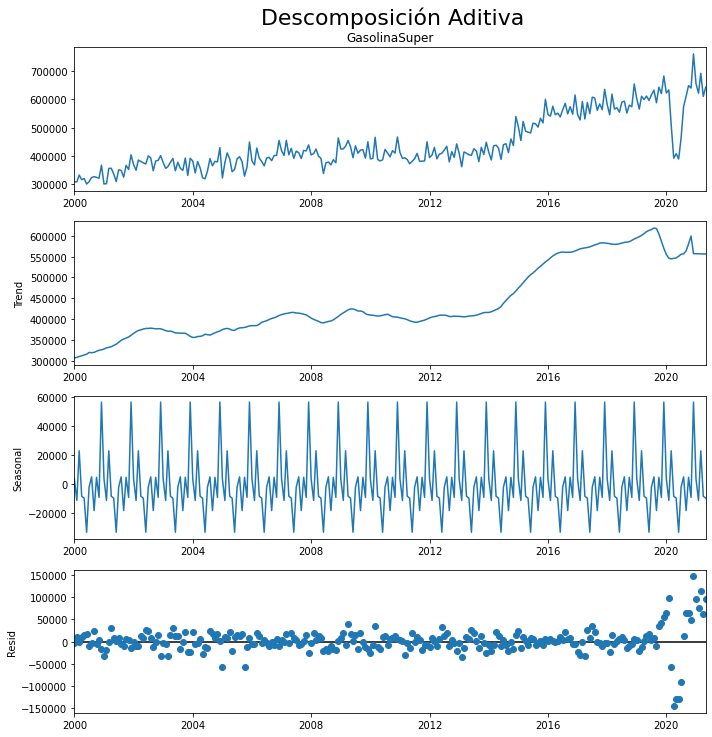

In [133]:
result_add = seasonal_decompose(data_consumo['GasolinaSuper'], model='additive', extrapolate_trend='freq')
plt.rcParams.update({'figure.figsize': (10,10)})
_ = result_add.plot().suptitle('Descomposición Aditiva', fontsize=22, x=0.55, y=1.02)

### Super dataset importaciones

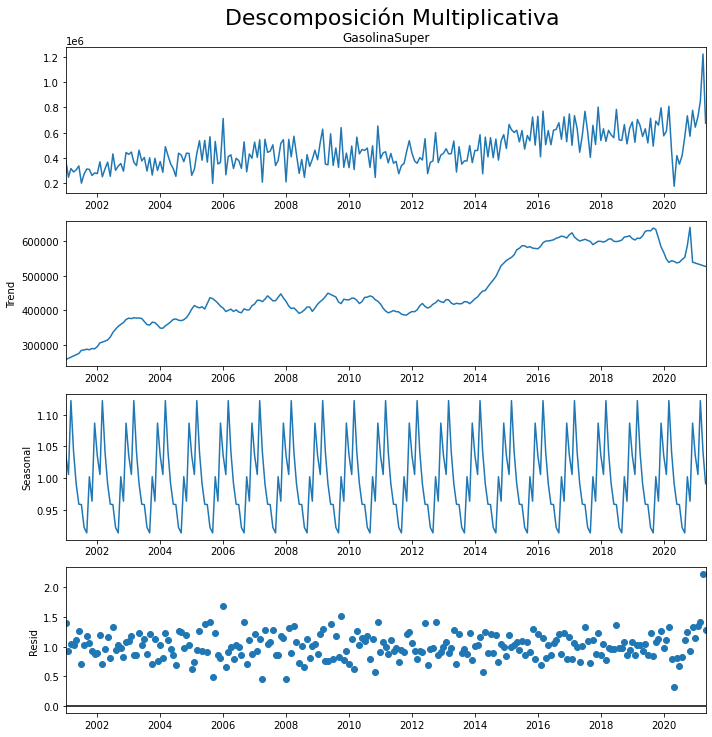

In [143]:
result_mul = seasonal_decompose(data_importaciones['GasolinaSuper'], model='multiplicative', extrapolate_trend='freq')
plt.rcParams.update({'figure.figsize': (10,10)})
_ = result_mul.plot().suptitle('Descomposición Multiplicativa', fontsize=22, x=0.55, y=1.02)

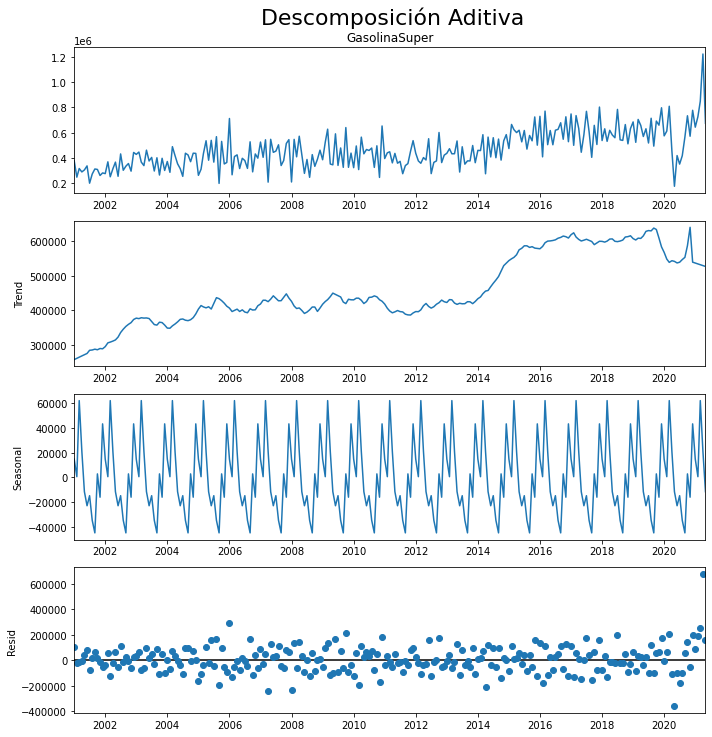

In [145]:
result_add = seasonal_decompose(data_importaciones['GasolinaSuper'], model='additive', extrapolate_trend='freq')
plt.rcParams.update({'figure.figsize': (10,10)})
_ = result_add.plot().suptitle('Descomposición Aditiva', fontsize=22, x=0.55, y=1.02)

# Graficos Autocorrelación

### Super consumo

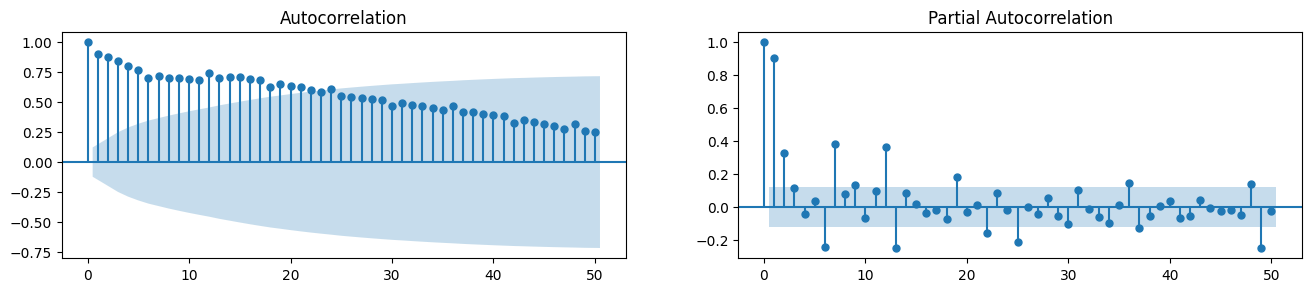

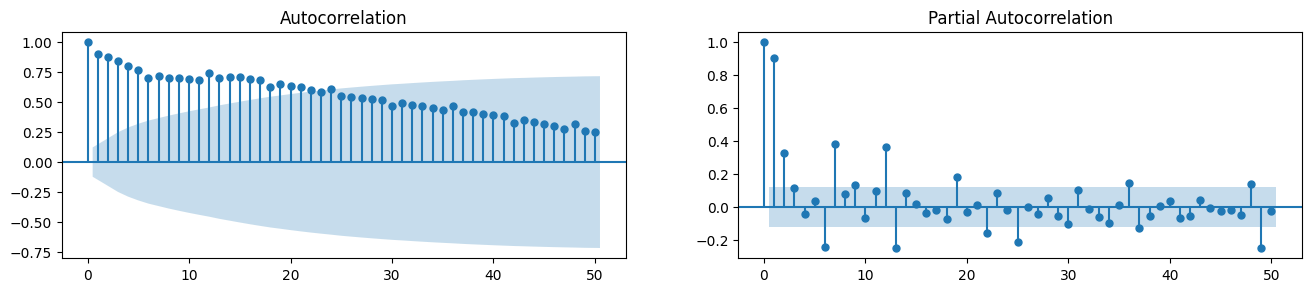

In [147]:
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(data_consumo.GasolinaSuper.tolist(), lags=50, ax=axes[0])
plot_pacf(data_consumo.GasolinaSuper.tolist(), lags=50, ax=axes[1])

### Super importaciones

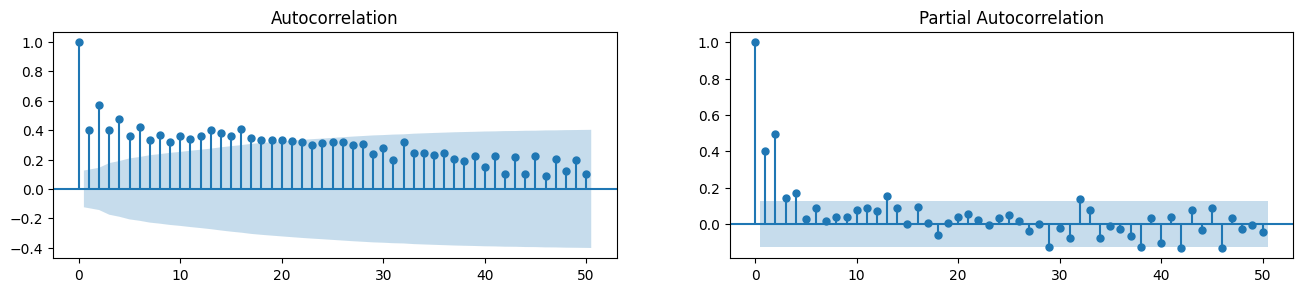

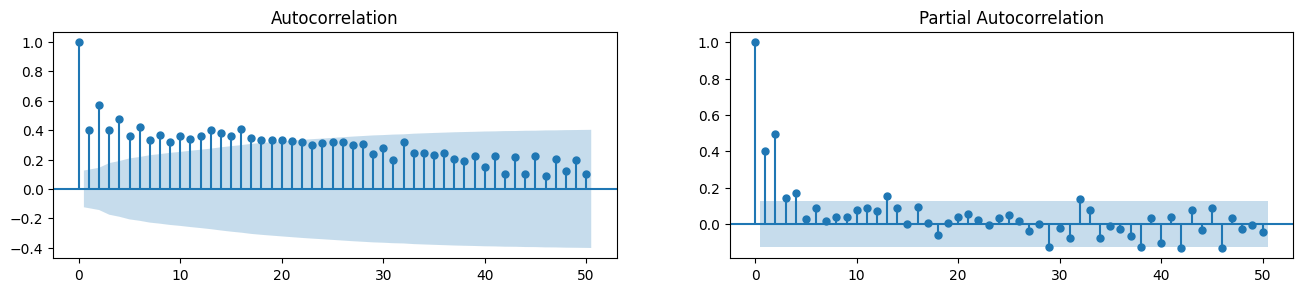

In [148]:
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(data_importaciones.GasolinaSuper.tolist(), lags=50, ax=axes[0])
plot_pacf(data_importaciones.GasolinaSuper.tolist(), lags=50, ax=axes[1])

# Prueba de Dickey-Fuller

### Super consumo

In [113]:
result = adfuller(data_consumo.GasolinaSuper, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -0.18613387013775287
p-value: 0.940154366626028
Critial Values:
   1%, -3.4575505077947746
Critial Values:
   5%, -2.8735087323013526
Critial Values:
   10%, -2.573148434859185


### Super importaciones

In [150]:
result = adfuller(data_importaciones.GasolinaSuper, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -1.7417617731245076
p-value: 0.40973407063597966
Critial Values:
   1%, -3.4577787098622674
Critial Values:
   5%, -2.873608704758507
Critial Values:
   10%, -2.573201765981991


# Modelo ARIMA

### Super consumo

In [43]:
sarima_model = SARIMAX(data_consumo.GasolinaSuper, order=(2,0,1), seasonal_order=(2, 1, 0, 24))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [44]:
results = sarima_model.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10235D+01    |proj g|=  5.36683D-01

At iterate    5    f=  1.07028D+01    |proj g|=  2.18023D-02

At iterate   10    f=  1.07002D+01    |proj g|=  1.11317D-02

At iterate   15    f=  1.06934D+01    |proj g|=  8.21368D-03

At iterate   20    f=  1.06929D+01    |proj g|=  1.75170D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     24      1     0     0   1.710D-06   1.069D+01
  F =   10.692865315322887     

CONVERG

In [45]:
results.aic

5508.132772075964

<AxesSubplot:>

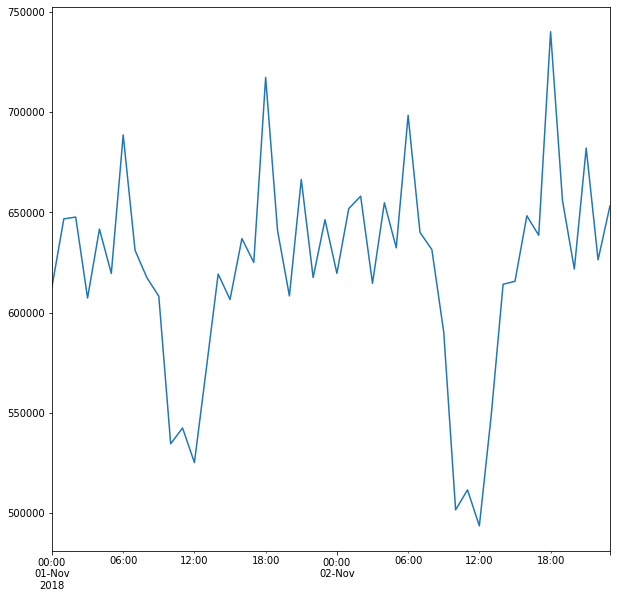

In [53]:
pred_1_2 = results.get_forecast(steps=24*2).predicted_mean
pred_1_2.index = pd.date_range(start='11/1/2018', end='11/3/2018', freq='H')[:-1]
pred_1_2.plot()

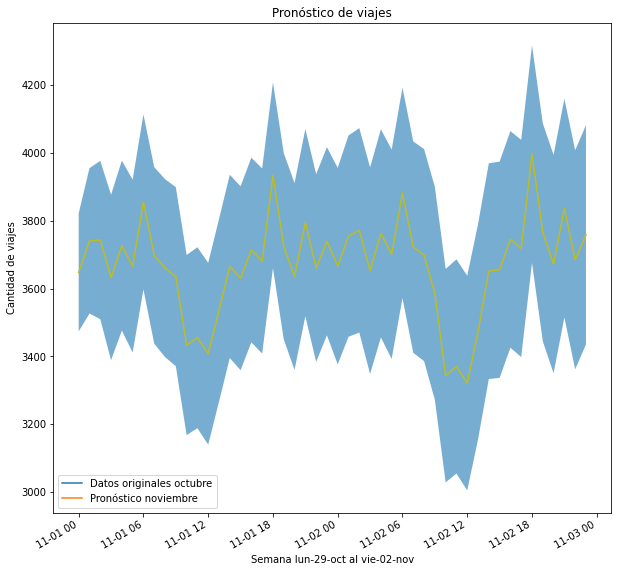

In [100]:
df_29_31 = data_consumo.loc['2018-10-29':'2018-10-31']
df_29_31.plot()

pred_1_2_conf = results.get_forecast(steps=24*2).conf_int()
pred_1_2_conf.index = pd.date_range(start='11/1/2018', end='11/3/2018', freq='H')[:-1]
pred_1_2_conf.head(15)
x = pd.date_range(start='11/1/2018', end='11/3/2018', freq='H')[:-1]
y1 = pred_1_2_conf['lower GasolinaSuper']
y2 = pred_1_2_conf['upper GasolinaSuper']
plt.fill_between(x, y1, y2, alpha=0.6)

pred_1_2 = results.get_forecast(steps=24*2).predicted_mean
pred_1_2.index = pd.date_range(start='11/1/2018', end='11/3/2018', freq='H')[:-1]
pred_1_2.plot()

plt.title('Pronóstico de viajes')
plt.ylabel('Cantidad de viajes')
plt.xlabel('Semana lun-29-oct al vie-02-nov')
plt.legend(('Datos originales octubre', 'Pronóstico noviembre'),
           loc='lower left')
plt.savefig('pronostico.png')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:          GasolinaSuper   No. Observations:                  257
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -3054.346
Date:                Thu, 05 Aug 2021   AIC                           6120.691
Time:                        18:02:47   BIC                           6141.962
Sample:                    01-01-2000   HQIC                          6129.246
                         - 05-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3587      0.032    -11.040      0.000      -0.422      -0.295
ar.L2         -0.1401      0.044     -3.193      0.001      -0.226      -0.054
ar.L3          0.0079      0.056      0.141      0.8

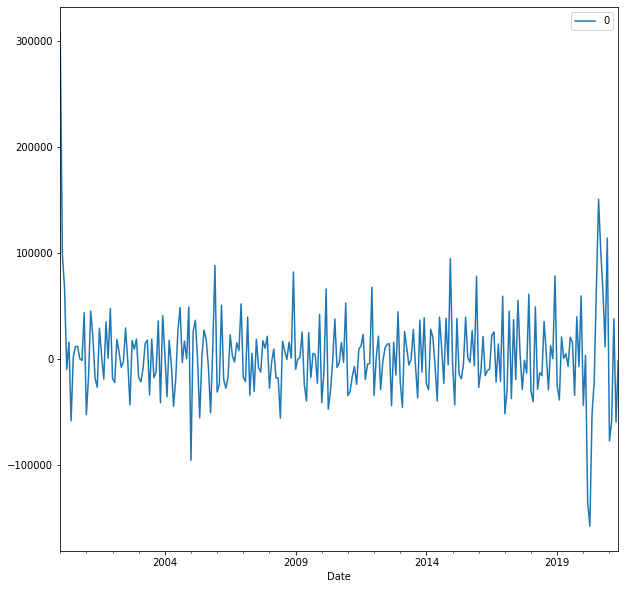

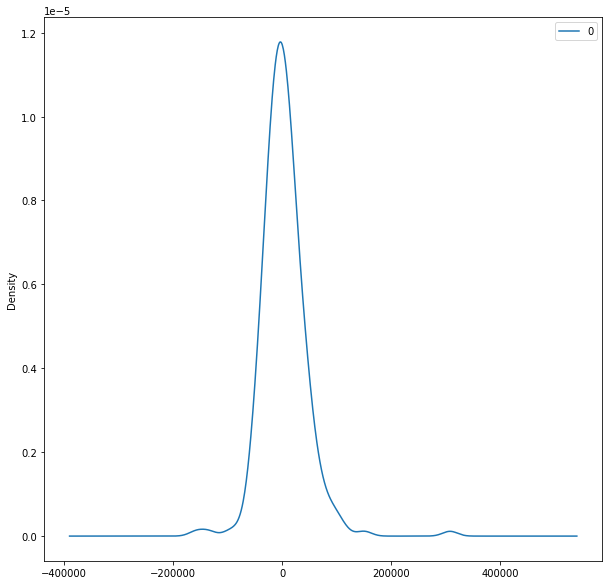

                   0
count     257.000000
mean     3360.510073
std     41359.524745
min   -157338.931742
25%    -19279.243089
50%      -123.125226
75%     21225.285197
max    308156.820000


In [34]:
model = ARIMA(data_consumo['GasolinaSuper'], order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())